In [237]:
# 导入相关库及配置
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor # sklearn库
import xgboost as xgb # xgboost库
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold  # 交叉验证，网格搜索
pd.options.display.max_columns = None  # 取消最大列显示限制
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")# 过滤警告信息，保证清爽输出
from sklearn.metrics import mean_squared_error, mean_absolute_error
import lightgbm as lgb
import datetime
import time
from sklearn.model_selection import learning_curve
import math
from time import time
import pickle

# 导入数据

In [238]:
train= pd.read_csv(r'./data/rf_train_dropmissing.csv')
train

,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,price,v_0,v_3,v_4,v_5,v_8,v_9,v_10,v_11,v_12,power_bin,regDate_year,creatDate_year,regDate_month,creatDate_month,regDate_day,creatDate_day,carAge_day,carAge_year
0,30.0,6,1.0,0.0,0.0,60.0,12.5,0.00,1046,7.522941,43.357796,2.159744,1.143786,0.235676,0.022816,0.097462,-2.881803,2.804097,-2.420821,1,2004,2016,4,4,2,4,4385,12.013699
1,40.0,1,2.0,0.0,0.0,1.0,15.0,0.17,4366,8.188689,45.305273,1.380657,-1.422165,0.264777,0.026597,0.020582,-4.900482,2.096338,-1.030483,0,2003,2016,3,3,1,9,4757,13.032877
2,115.0,15,1.0,0.0,0.0,163.0,12.5,0.00,2806,8.735847,45.978359,-0.998467,-0.996911,0.251410,0.062173,0.027075,-4.846749,1.803559,1.565330,5,2004,2016,4,4,3,2,4382,12.005479
3,109.0,10,0.0,0.0,1.0,193.0,15.0,0.00,434,7.783224,45.687478,0.883600,-2.228079,0.274293,0.033395,0.000000,-4.509599,1.285940,-0.501868,6,1996,2016,9,3,8,12,7125,19.520548
4,110.0,5,1.0,0.0,0.0,68.0,5.0,0.00,6977,8.556414,44.383511,-1.571239,2.246088,0.228036,0.078819,0.121534,-1.896240,0.910783,0.931110,2,2012,2016,1,3,3,13,1531,4.194521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,121.0,10,4.0,0.0,1.0,163.0,15.0,0.00,4576,8.682708,45.316543,-0.736609,-1.505820,0.280264,0.071158,0.019174,1.988114,-2.983973,0.589167,5,2000,2016,6,3,7,27,5772,15.813699
149996,116.0,11,0.0,0.0,0.0,125.0,10.0,0.00,2826,9.159047,45.972058,-2.366699,0.698012,0.253217,0.099681,0.079371,1.839166,-2.774615,2.553994,4,2009,2016,11,3,2,12,2322,6.361644
149997,60.0,11,1.0,1.0,0.0,90.0,6.0,0.00,3302,8.922658,44.733481,-2.279091,1.423661,0.233353,0.100118,0.097914,2.439812,-1.630677,2.290197,2,2010,2016,10,3,3,28,2003,5.487671
149998,34.0,10,3.0,1.0,0.0,156.0,15.0,0.00,1877,8.516993,45.658634,-1.179812,0.620680,0.256369,0.083558,0.081498,2.075380,-2.633719,1.414937,5,2006,2016,3,4,12,1,3673,10.063014


In [239]:
test= pd.read_csv(r'./data/rf_test_dropmissing.csv')
test

,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,v_0,v_3,v_4,v_5,v_8,v_9,v_10,v_11,v_12,power_bin,regDate_year,creatDate_year,regDate_month,creatDate_month,regDate_day,creatDate_day,carAge_day,carAge_year
0,67.0,0,1.0,0.0,0.0,101.0,15.0,0.0,5019,42.142061,1.466344,1.009846,0.236520,0.046233,0.094522,3.619512,-0.280607,-2.019761,3,2000,2000,5,5,1,1,5790,15.863014
1,19.0,6,2.0,0.0,0.0,73.0,6.0,0.0,1505,43.907034,1.276718,-1.065338,0.261518,0.046784,0.035385,2.997376,-1.406705,-1.020884,2,1995,1995,2,2,11,11,7698,21.090411
2,5.0,5,4.0,0.0,0.0,120.0,5.0,0.0,1776,45.389665,-2.447316,0.624268,0.261691,0.079655,0.073586,-3.951084,-0.433467,0.918964,3,2009,2009,6,6,6,6,2468,6.761644
3,22.0,9,1.0,0.0,0.0,58.0,15.0,0.0,26,42.788775,1.708806,1.119165,0.236050,0.026830,0.096614,-2.846788,2.800267,-2.524610,1,2002,2002,6,6,1,1,5035,13.794521
4,46.0,6,0.0,0.0,0.0,116.0,15.0,0.0,738,43.670763,0.470315,0.134032,0.257000,0.057771,0.068852,2.839010,-1.659801,-0.924142,3,2003,2003,3,3,1,1,4754,13.024658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,4.0,4,0.0,0.0,1.0,150.0,15.0,0.0,5564,46.321013,-0.622359,-0.778349,0.263668,0.076393,0.039272,2.072901,-2.531869,1.716978,4,2004,2004,10,10,5,5,4173,11.432877
49996,65.0,1,0.0,0.0,0.0,179.0,4.0,0.0,5220,48.086547,-2.672160,0.357440,0.255310,0.108425,0.067841,1.358504,-3.290295,4.269809,5,2013,2013,4,4,9,9,1079,2.956164
49997,4.0,4,0.0,0.0,1.0,147.0,12.5,0.0,3795,46.145279,-0.288329,-0.687112,0.262933,0.071968,0.042966,2.165658,-2.417885,1.370612,4,2004,2004,12,12,11,11,4113,11.268493
49998,40.0,1,4.0,0.0,1.0,176.0,15.0,0.0,61,45.507088,-0.434930,-1.845040,0.282106,0.067526,0.009006,2.030114,-2.939244,0.569078,5,2002,2002,7,7,2,2,5017,13.745205


In [240]:
sub= pd.read_csv(r'./data/used_car_sample_submit.csv', sep=',')
sub

,SaleID,price
0,150000,0
1,150001,0
2,150002,0
3,150003,0
4,150004,0
...,...,...
49995,199995,0
49996,199996,0
49997,199997,0
49998,199998,0


# 划分数据集

In [241]:
train_y=train['price']
train_y

0         7.522941
1         8.188689
2         8.735847
3         7.783224
4         8.556414
            ...   
149995    8.682708
149996    9.159047
149997    8.922658
149998    8.516993
149999    8.455318
Name: price, Length: 150000, dtype: float64

In [242]:
del train["price"]
train

,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,v_0,v_3,v_4,v_5,v_8,v_9,v_10,v_11,v_12,power_bin,regDate_year,creatDate_year,regDate_month,creatDate_month,regDate_day,creatDate_day,carAge_day,carAge_year
0,30.0,6,1.0,0.0,0.0,60.0,12.5,0.00,1046,43.357796,2.159744,1.143786,0.235676,0.022816,0.097462,-2.881803,2.804097,-2.420821,1,2004,2016,4,4,2,4,4385,12.013699
1,40.0,1,2.0,0.0,0.0,1.0,15.0,0.17,4366,45.305273,1.380657,-1.422165,0.264777,0.026597,0.020582,-4.900482,2.096338,-1.030483,0,2003,2016,3,3,1,9,4757,13.032877
2,115.0,15,1.0,0.0,0.0,163.0,12.5,0.00,2806,45.978359,-0.998467,-0.996911,0.251410,0.062173,0.027075,-4.846749,1.803559,1.565330,5,2004,2016,4,4,3,2,4382,12.005479
3,109.0,10,0.0,0.0,1.0,193.0,15.0,0.00,434,45.687478,0.883600,-2.228079,0.274293,0.033395,0.000000,-4.509599,1.285940,-0.501868,6,1996,2016,9,3,8,12,7125,19.520548
4,110.0,5,1.0,0.0,0.0,68.0,5.0,0.00,6977,44.383511,-1.571239,2.246088,0.228036,0.078819,0.121534,-1.896240,0.910783,0.931110,2,2012,2016,1,3,3,13,1531,4.194521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,121.0,10,4.0,0.0,1.0,163.0,15.0,0.00,4576,45.316543,-0.736609,-1.505820,0.280264,0.071158,0.019174,1.988114,-2.983973,0.589167,5,2000,2016,6,3,7,27,5772,15.813699
149996,116.0,11,0.0,0.0,0.0,125.0,10.0,0.00,2826,45.972058,-2.366699,0.698012,0.253217,0.099681,0.079371,1.839166,-2.774615,2.553994,4,2009,2016,11,3,2,12,2322,6.361644
149997,60.0,11,1.0,1.0,0.0,90.0,6.0,0.00,3302,44.733481,-2.279091,1.423661,0.233353,0.100118,0.097914,2.439812,-1.630677,2.290197,2,2010,2016,10,3,3,28,2003,5.487671
149998,34.0,10,3.0,1.0,0.0,156.0,15.0,0.00,1877,45.658634,-1.179812,0.620680,0.256369,0.083558,0.081498,2.075380,-2.633719,1.414937,5,2006,2016,3,4,12,1,3673,10.063014


In [243]:
# 划分训练集和验证集
from sklearn.model_selection import train_test_split
## Split data with val
x_train,x_val,y_train,y_val = train_test_split(train,train_y,test_size=0.15, random_state = 22)


In [244]:
x_train.shape

(127500, 27)

In [245]:
x_val.shape

(22500, 27)

## 学习曲线

In [246]:
def plot_learning_curve(estimator, title, X, y,
                        ax = None, # 选择子图
                        ylim = None, # 设置纵坐标的取值范围
                        cv = None, # 交叉验证
                        n_jobs = None # 设定所要使用的线程
                       ):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, 
                                                            shuffle=True, 
                                                            cv=cv,
                                                            #random_statue=?,
                                                            n_jobs=n_jobs
                                                           )
    if ax == None:
        ax = plt.gca()
    else:
        ax = plt.figure()
    ax.set_title(title)
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")
    ax.grid()
    ax.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color='r', label="Training score")
    ax.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color='g', label="Test score")
    ax.legend(loc="best")
    return ax

# 随机森林

In [187]:
## Train and Predict
print('Predict RF...')
model_rf = RandomForestRegressor(n_estimators=250,n_jobs=-1)
model_rf = model_rf.fit(x_train,y_train)
val_rf = model_rf.predict(x_val)
MAE_Weighted = mean_absolute_error(np.exp(y_val),np.exp(val_rf))
print('MAE_Weighted:',MAE_Weighted)
sub_rf = model_rf.predict(test)

Predict RF...
MAE_Weighted: 600.5446014502253


In [133]:
# # 学习曲线
# begin=time.time()
# axisx =np.arange(230,270,10)
# rs = []
# for i in axisx:
#     model_rf = RandomForestRegressor(n_estimators =i,n_jobs=-1)
#     model_rf = model_rf.fit(x_train,y_train)
#     val_rf = model_rf.predict(x_val)
#     MAE_Weighted = mean_absolute_error(np.exp(y_val),np.exp(val_rf))
#     rs.append(MAE_Weighted)    
# print(axisx[rs.index(min(rs))],min(rs))
# plt.figure(figsize=(20,5))
# plt.plot(axisx,rs,c="green",label="RandomForestRegressor")
# plt.ylabel("MAE")
# plt.xlabel("n_estimators")
# plt.legend()
# plt.show()
# end=time.time()
# print("运行时间：",end-begin)

AttributeError: 'builtin_function_or_method' object has no attribute 'time'

In [134]:
subA_rf = pd.Series(subA_rf)
subA_rf

NameError: name 'subA_rf' is not defined

In [135]:
sub['price'] = subA_rf
sub

NameError: name 'subA_rf' is not defined

In [136]:
sub.to_csv(r'./data/1_sub_power_mean.csv',index=False)

# xgboost

## 建模

### xgboost core

In [250]:
# xgboost库调用
dtrain = xgb.DMatrix(x_train, y_train)
dval = xgb.DMatrix(x_val)

In [251]:
param_default = {
          'booster':'gbtree',# 弱分类器
          'verbosity':1, # 打印日志,并非默认
          'subsample':1, # 随机抽样比例
          'objective':'reg:linear', # 目标函数
          'eta':0.3, #学习率
          'max_depth':6,
          'gamma':0,
          'alpha':0, # L1正则项参数
          'lambda':1, # L2正则项参数
          'colsample_bytree':1,
          'colsample_bylevel':1,
          'colsample_bynode':1
}

In [268]:
param_latest = {'booster':'gbtree',# 弱分类器
          'verbosity':1, # 打印日志,并非默认
          'subsample':1, # 随机抽样比例
          'objective':'reg:linear', # 目标函数
          'eta':0.1, #学习率
          'max_depth':4,
          'gamma':0,
          'alpha':0, # L1正则项参数
          'lambda':1, # L2正则项参数
          'colsample_bytree':0.8,
          'colsample_bylevel':1,
          'colsample_bynode':0.9
}
# 树的数量
num_round = 1000

In [269]:
# 默认参数下模型的表现如何
xgb_core_default = xgb.train(param_default, dtrain, num_round)
val_xgb_default = xgb_core_default.predict(dval)
print(val_xgb_default.shape)
print(val_xgb_default)
MAE_Weighted = mean_absolute_error(np.exp(y_val),np.exp(val_xgb_default))
print('MAE_Weighted:',MAE_Weighted)

[17:04:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
(22500,)
[ 8.342805   8.4226055  7.330863  ... 10.381688   6.576985   9.130338 ]
MAE_Weighted: 559.8384511269463


In [270]:
# 调整参数下模型的表现如何
xgb_core_latest = xgb.train(param_latest, dtrain, num_round)
val_xgb_latest = xgb_core_latest.predict(dval)
print(val_xgb_latest.shape)
print(val_xgb_latest)
MAE_Weighted = mean_absolute_error(np.exp(y_val),np.exp(val_xgb_latest))
print('MAE_Weighted:',MAE_Weighted)

[17:06:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
(22500,)
[ 8.366468   8.283246   7.3217793 ... 10.477568   6.650198   8.419125 ]
MAE_Weighted: 597.295446541765


### xgboost sklearn

In [193]:
# sklearn
model_xgb_sklearn = XGBRegressor(base_score=0.5, 
                         booster='gbtree', 
                         learning_rate=0.13999999999999996, 
                         n_estimators=250, 
                         n_jobs=1, 
                         objective='reg:linear', 
                         random_state=1, 
                         reg_alpha=0, 
                         reg_lambda=1, 
                         subsample=1 # 随机抽样的比例，默认为1   0.7999999999999999
                        )
model_xgb_sklearn = model_xgb_sklearn.fit(x_train,y_train)

[21:34:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


In [194]:
val_xgb_sklearn = model_xgb_sklearn.predict(x_val)
print(val_xgb_sklearn.shape)
print(val_xgb_sklearn)
MAE_Weighted = mean_absolute_error(np.exp(y_val),np.exp(val_xgb_sklearn))
print('MAE_Weighted:',MAE_Weighted)

(22500,)
[ 8.2438965  8.242099   7.2908945 ... 10.492096   6.6453605  8.559961 ]
MAE_Weighted: 606.0506727077908


In [195]:
# 画出训练集和测试集的学习曲线，
# cv = KFold(n_splits=5, shuffle=True)
# plot_learning_curve(model_xgb, "xgboost", x_train, y_train, ax=None, cv=cv)
# plt.show()

### 预测

In [196]:
dtest = xgb.DMatrix(test)

In [197]:
# xgb_core_default测试集结果：sub_xgb_core
sub_xgb_core_default = xgb_core_default.predict(dtest)
print(sub_xgb_core_default.shape)
print(sub_xgb_core_default)
sub['price'] = pd.Series(np.exp(sub_xgb_core_default))
print(sub['price'])
sub.to_csv(r'./data/sub_xgboost_core_default.csv',index=False)

(50000,)
[7.1749377 7.6117063 8.974324  ... 8.6223345 8.492102  8.528438 ]
0         1306.278809
1         2021.724731
2         7897.679199
3         1239.216797
4         2160.976807
             ...     
49995     6710.597656
49996    19322.347656
49997     5554.337891
49998     4876.103027
49999     5056.539551
Name: price, Length: 50000, dtype: float32


In [198]:
# xgb_core_latest测试集结果：sub_xgb_core
sub_xgb_core_latest = xgb_core_latest.predict(dtest)
print(sub_xgb_core_latest.shape)
print(sub_xgb_core_latest)
sub['price'] = pd.Series(np.exp(sub_xgb_core_latest))
print(sub['price'])
sub.to_csv(r'./data/sub_xgboost_core_latest.csv',index=False)

(50000,)
[7.0539913 7.516558  9.122524  ... 8.671442  8.540423  8.542973 ]
0         1157.469360
1         1838.229492
2         9159.292969
3         1261.855957
4         2102.652100
             ...     
49995     6113.787598
49996    19828.177734
49997     5833.905762
49998     5117.510742
49999     5130.572754
Name: price, Length: 50000, dtype: float32


In [199]:
# xgb_sklearn测试集结果：subA_xgb_sklearn
sub_xgb_sklearn = model_xgb_sklearn.predict(test)
print(sub_xgb_sklearn.shape)
print(sub_xgb_sklearn)
sub['price'] = pd.Series(np.exp(sub_xgb_sklearn))
print(sub['price'])
sub.to_csv(r'./data/sub_xgboost_sklearn.csv',index=False)

(50000,)
[7.1220903 7.5931377 8.98772   ... 8.659668  8.516304  8.567091 ]
0         1239.037720
1         1984.530640
2         8004.182617
3         1174.885376
4         2061.449219
             ...     
49995     6106.911621
49996    18771.132812
49997     5765.620117
49998     4995.556152
49999     5255.818359
Name: price, Length: 50000, dtype: float32


## 调参

### booster弱评估器

In [111]:
# 弱评估器的选择
for booster in ["gbtree", "gblinear", "dart"]:
    print(booster)
    param = {
        'booster':booster,# 弱分类器
        'objective':'reg:linear', # 目标函数
        'subsample':1, # 随机抽样比例
        'verbosity':1, #不打印中间日志数据
        'eta':0.1 #学习率
    }
    # 树的数量
    num_round = 250
    model_xgb = xgb.train(param,dtrain, num_round)
    val_xgb = model_xgb.predict(dtest)
    MAE_Weighted = mean_absolute_error(np.exp(y_val),np.exp(val_xgb))
    print('MAE_Weighted:',MAE_Weighted)
    
# 并非线性的，gbtree略高

gbtree
[17:06:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
MAE_Weighted: 628.7942947861989
gblinear
[17:07:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[17:07:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "subsample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


MAE_Weighted: 1141.9293208522797
dart
[17:07:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarede

### subsample有放回随机取样

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
i = 0.000000
[15:36:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[15:36:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[15:36:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[15:36:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[15:36:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squ

i = 1.000000
[15:51:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[15:51:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[15:52:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[15:52:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[15:53:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
1.0 0.9600666907118894 2.8127309683397274e-07
0.5555555555555556 0.9593831979930532 2.450807797518044e

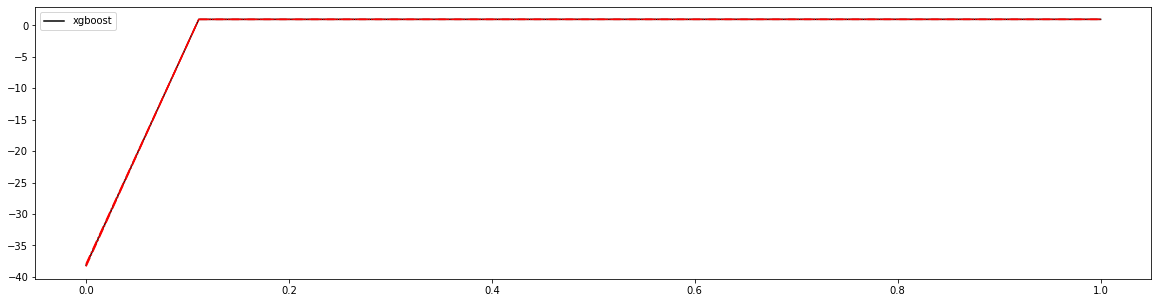

In [53]:
# 调参subsample取值，n_estimators=100
axisx = np.linspace(0, 1, 10)
cv = KFold(n_splits=5, shuffle=True)
rs = []
var = []
ge = []
print(axisx)
for i in axisx:
    print("i = %f" %i)
    reg = XGBRegressor(base_score=0.5, 
                         booster='gbtree', # 选择弱评估器
                         learning_rate=0.13999999999999996, 
                         n_estimators=100, 
                         n_jobs=1, 
                         objective='reg:linear', 
                         random_state=1, 
                         reg_alpha=0, 
                         reg_lambda=1, 
                         subsample=i # 随机抽样的比例，默认为1   0.7999999999999999
                        )
    cvresult = cross_val_score(reg, x_train, y_train, cv=cv)
    rs.append(cvresult.mean()) # R2  1-偏差
    var.append(cvresult.var()) # 方差
    ge.append((1 - cvresult.mean())**2 + cvresult.var()) # 泛化误差的可控部分
print(axisx[rs.index(max(rs))], max(rs), var[rs.index(max(rs))]) # R2最高所对应的参数值，并打印这个参数对应的方差
print(axisx[var.index(min(var))], rs[var.index(min(var))], min(var)) # 打印方差最低时对应的参数取值，并打印这个参数下的R2
print(axisx[ge.index(min(ge))], rs[ge.index(min(ge))], var[ge.index(min(ge))], min(ge)) # 打印泛化误差可控部分的参数取值，并打印这个参数下的R2.方差，泛化误差
rs = np.array(rs)
var = np.array(var)
plt.figure(figsize=(20,5))
plt.plot(axisx, rs, c='black', label='xgboost')
plt.plot(axisx, rs + var, c='red', linestyle='-.')
plt.plot(axisx, rs - var, c='red', linestyle='-.')
plt.legend()
plt.show()
# subsample应该取1

### alpha&lambda正则化参数
网格搜索

In [49]:
param = {
    "reg_alpha":np.arange(0,2,0.5),
    "reg_lambda":np.arange(0,2,0.5)
}
cv = KFold(n_splits=5, shuffle=True)
gscv = GridSearchCV(model_xgb_sklearn, param_grid=param, scoring="neg_mean_absolute_error", cv=cv)
gscv.fit(x_train, y_train)

[20:34:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[20:34:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[20:34:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[20:34:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[20:34:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[20:34:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:17

KeyboardInterrupt: 

In [20]:
gscv.best_params_

{'reg_alpha': 1.0, 'reg_lambda': 0.0}

In [21]:
gscv.best_score_

-0.14538696677457566

### n_estimators&eta
网格搜索，但网格搜索不可解释，先通过xgboost.cv确定范围

In [51]:
param = {
    "n_estimators":np.arange(0,400,50),
    "eta":np.arange(0,1,0.2)
}
cv = KFold(n_splits=5, shuffle=True)
gscv = GridSearchCV(model_xgb_sklearn, param_grid=param, scoring="neg_mean_absolute_error", cv=cv)
gscv.fit(x_train, y_train)

[20:34:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[20:34:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[20:34:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[20:34:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[20:34:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[20:34:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:17

[21:09:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[21:09:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[21:09:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[21:10:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[21:10:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[21:11:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:17

[21:46:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[21:46:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[21:47:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[21:48:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:17

[22:25:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[22:26:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[22:27:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[22:28:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[22:29:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[22:30:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:17

[23:07:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[23:08:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[23:09:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[23:10:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[23:12:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[23:13:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:17

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=0.13999999999999996,
                                    max_delta_step=None, max_depth=None,
                                    min_child_weight=No...
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=1, num_parallel_tree=None,
                                    objective='reg:linear', random_state=1,
                                    reg_alpha=0, reg_lambda=1,
                                    scal

In [52]:
gscv.best_params_
#{'eta': 0.0, 'n_estimators': 350}

{'eta': 0.0, 'n_estimators': 350}

In [53]:
gscv.best_score_
#-0.13605462277256664

-0.13605462277256664

### gamma控制复杂度剪枝

In [ ]:
import xgboost as xgb
#为了便捷，使用全数据
dfull = xgb.DMatrix(train, train_y)
#设定参数
param1 = {'verbosity':1,'objective':'reg:linear',"gamma":0} 
num_round = 250
n_fold=5

#使用类xgb.cv time0 = time()
cvresult1 = xgb.cv(param1, dtrain, num_round,n_fold) 
#看看类xgb.cv生成了什么结果？ cvresult1

In [ ]:
cvresult1

In [ ]:
plt.figure(figsize=(20,5)) 
plt.grid()
plt.plot(range(1,251),cvresult1.iloc[:,0],c="red",label="train,gamma=0") 
plt.plot(range(1,251),cvresult1.iloc[:,2],c="orange",label="test,gamma=0") 
plt.xlabel("n_estimators")
plt.ylabel("RMSE")
plt.legend()
plt.show()

### 综合调参

In [231]:
param1 = {
    'verbosity':1 #并非默认
    ,'objective':'reg:linear' #并非默认
    ,"subsample":1
    ,"max_depth":6
    ,"eta":0.3
    ,"gamma":0
    ,"lambda":1
    ,"alpha":0
    ,"colsample_bytree":1
    ,"colsample_bylevel":1
    ,"colsample_bynode":1
}
num_round1 = 50
nfold = 3
time0 = time()
cvresult1 = xgb.cv(param1, dtrain, num_round1, nfold)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

# 之前确定的参数
# 调参结果param2
param2 = {'verbosity':1, #并非默认
          'objective':'reg:linear',
          'eta':0.1,
          'max_depth':4,
          'gamma':0,
          'alpha':0,
          'lambda':1,
          'colsample_bytree':0.8,
          'colsample_bylevel':1,
          'colsample_bynode':0.9
}
num_round2 = 50
time0 = time()
cvresult2 = xgb.cv(param2, dtrain, num_round2, nfold)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

# 当前正在调整的参数
param3 = {'verbosity':1, #并非默认
          'objective':'reg:linear',
          'eta':0.1,
          'max_depth':4,
          'gamma':0,
          'alpha':0,
          'lambda':1,
          'colsample_bytree':0.8,
          'colsample_bylevel':1,
          'colsample_bynode':1
}
num_round3 = 50
time0 = time()
cvresult3 = xgb.cv(param3, dtrain, num_round3, nfold)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
print("Success!")

[11:03:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[11:03:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[11:03:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
00:11:392807
[11:03:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[11:03:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[11:03:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regress

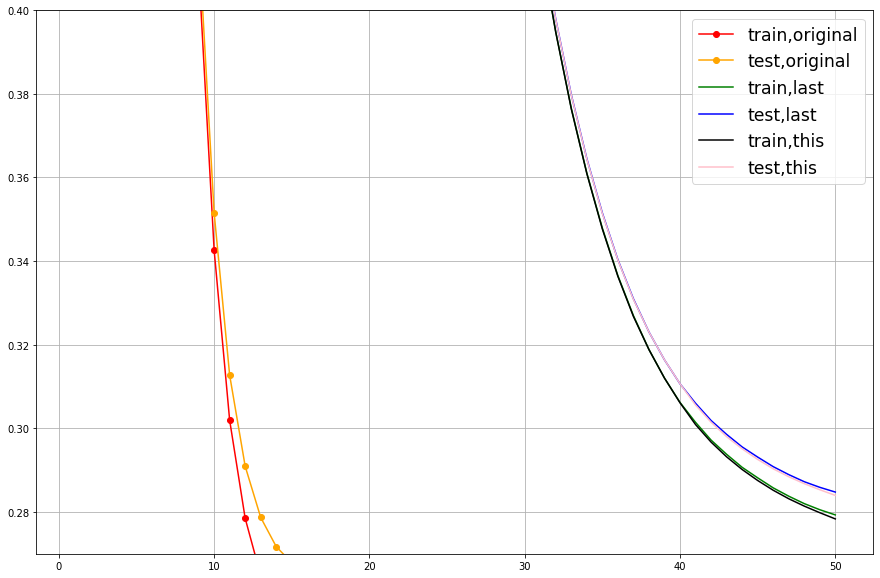

In [232]:
fig, ax = plt.subplots(1,figsize=(15,10))
ax.set_ylim(top=0.4, bottom=0.27)
ax.grid()
ax.plot(range(1,51), cvresult1.iloc[:,0], 'o-', c="red",label="train,original")
ax.plot(range(1,51), cvresult1.iloc[:,2], 'o-', c="orange",label="test,original")
ax.plot(range(1,51),cvresult2.iloc[:,0], c="green",label="train,last")
ax.plot(range(1,51),cvresult2.iloc[:,2], c="blue",label="test,last")
ax.plot(range(1,51),cvresult3.iloc[:,0],c="black",label="train,this")
ax.plot(range(1,51),cvresult3.iloc[:,2],c="pink",label="test,this")
ax.legend(fontsize="xx-large")
plt.show()

## 保存模型

In [251]:
import pickle

In [14]:
pickle.dump(xgb_core, open("./src_model/xgboost_core.dat", "wb")) # w:writing, b:binary

In [18]:
pickle.dump(model_xgb_sklearn, open("./src_model/xgboost_sklearn.dat", "wb"))

## 读取模型

In [17]:
load_xgb_core = pickle.load(open('./src_model/xgboost_core.dat', 'rb'))
load_xgb_core

In [18]:
load_xgb_sklearn = pickle.load(open('./src_model/xgboost_sklearn.dat', 'rb'))
load_xgb_sklearn

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.13999999999999996, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=250, n_jobs=1, num_parallel_tree=1,
             objective='reg:linear', random_state=1, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [19]:
# xgboost库调用
dtrain = xgb.DMatrix(x_train, y_train)
dval = xgb.DMatrix(x_val)
dtest = xgb.DMatrix(test)

In [20]:
# xgb_core
val_xgb_core = load_xgb_core.predict(dval)
MAE_Weighted = mean_absolute_error(np.exp(y_val),np.exp(val_xgb_core))
print('MAE_Weighted:',MAE_Weighted)

MAE_Weighted: 655.0617295408885


In [21]:
# xgb_sklearn
val_xgb_sklearn = load_xgb_sklearn.predict(x_val)
MAE_Weighted = mean_absolute_error(np.exp(y_val),np.exp(val_xgb_sklearn))
print('MAE_Weighted:',MAE_Weighted)

MAE_Weighted: 557.6919043099298


## 模型预测

In [19]:
# xgb_core测试集结果：sub_xgb_core
sub_xgb_core = np.exp(load_xgb_core.predict(dtest))
print(sub_xgb_core.shape)
print(sub_xgb_core)
sub['price'] = pd.Series(sub_xgb_core)
sub.to_csv(r'./data/sub_xgboost_core.csv',index=False)

NameError: name 'load_xgb_core' is not defined

In [23]:
sub['price']

0         1214.402954
1         1884.047607
2         9021.264648
3         1130.617798
4         2075.006592
             ...     
49995     6643.552246
49996    19926.162109
49997     5916.916504
49998     5294.833008
49999     4667.894531
Name: price, Length: 50000, dtype: float32

In [24]:
# xgb_sklearn测试集结果：subA_xgb_sklearn
sub_xgb_sklearn = np.exp(load_xgb_sklearn.predict(test))
print(sub_xgb_sklearn.shape)
print(sub_xgb_sklearn)
sub['price'] = pd.Series(sub_xgb_sklearn)
sub.to_csv(r'./data/sub_xgboost_sklearn.csv',index=False)

(50000,)
[1213.213  2017.0997 7898.244  ... 6009.51   4987.6157 5319.36  ]


In [25]:
sub['price']

0         1213.213013
1         2017.099731
2         7898.244141
3          974.214844
4         2001.374878
             ...     
49995     6730.203125
49996    19315.015625
49997     6009.509766
49998     4987.615723
49999     5319.359863
Name: price, Length: 50000, dtype: float32

# LightGBM

## lgb_core

In [255]:
ltrain = lgb.Dataset(x_train, label = y_train)
ltest = lgb.Dataset(x_val, label = y_val)

In [266]:
lgb_param_default = {
    'verbosity':-1, # 不打印中间日志信息
    'num_leaves':60, # 每棵树的叶子的数量
    'objective':'regression', # 目标函数：回归
    'max_depth': 6, # 每棵树的最大深度
    'learning_rate':0.04, # 学习率
    'subsample':0.85, # 随机抽样比例
    'min_data_in_leaf':20 # 一个叶子上数据的最小数量. 可以用来处理过拟合，默认20
}
lgb_num_round = 350

In [267]:
lgb_core = lgb.train(lgb_param_default,ltrain,lgb_num_round)
val_lgb_core = lgb_core.predict(x_val)
print(val_lgb_core.shape)
print(val_lgb_core)
MAE_Weighted = mean_absolute_error(np.exp(y_val),np.exp(val_lgb_core))
print('MAE_Weighted:',MAE_Weighted)

(22500,)
[ 8.36716448  8.25486148  7.33011162 ... 10.53582856  6.69531783
  8.38013537]
MAE_Weighted: 645.213803537227


In [203]:
# lgb_core测试集结果：sub_lgb_core
sub_lgb_core = lgb_core.predict(test)
print(sub_lgb_core.shape)
print(sub_lgb_core)
sub['price'] =  pd.Series(np.exp(sub_lgb_core))
print(sub['price'])
sub.to_csv(r'./data/sub_lgb_core.csv',index=False)

(50000,)
[7.12129571 7.59371076 9.06126009 ... 8.61157873 8.46657514 8.54517741]
0         1238.053556
1         1985.668201
2         8614.999530
3         1019.752994
4         2007.634163
             ...     
49995     6884.084282
49996    19042.781967
49997     5494.916850
49998     4753.208511
49999     5141.897265
Name: price, Length: 50000, dtype: float64


## sklearn接口

In [204]:
print('Predict LightGBM...')
model_lgb = lgb.LGBMRegressor(n_estimators =14000,learning_rate=0.04,num_leaves=60,subsample= 0.85)
model_lgb = model_lgb.fit(x_train,y_train)
val_lgb_sklearn = model_lgb.predict(x_val)

Predict LightGBM...


In [205]:
print(val_lgb_sklearn.shape)
print(val_lgb_sklearn)
MAE_Weighted = mean_absolute_error(np.exp(y_val),np.exp(val_lgb_sklearn))
print('MAE_Weighted:',MAE_Weighted)

(22500,)
[ 8.26528219  8.36162414  7.32619802 ... 10.38368213  6.64213324
  8.92573454]
MAE_Weighted: 480.36103400243553


In [206]:
sub_lgb_sklearn = model_lgb.predict(test)
print(sub_lgb_sklearn.shape)
print(sub_lgb_sklearn)
sub['price'] = pd.Series(np.exp(sub_lgb_sklearn))
print(sub['price'])
sub.to_csv(r'./data/sub_lgb_sklearn.csv',index=False)

(50000,)
[7.11054946 7.60256796 9.00948008 ... 8.62308285 8.46683941 8.56020858]
0         1224.820348
1         2003.333786
2         8180.267070
3         1051.619772
4         2007.055825
             ...     
49995     6781.304751
49996    19026.956676
49997     5558.496018
49998     4754.464801
49999     5219.769801
Name: price, Length: 50000, dtype: float64


# Stacking模型融合

In [207]:
'''
data
x_train   y_train
x_val     y_val
test
-------------
xgboost
core:
val_xgb_core_default
sub_xgb_core_default
val_xgb_core_latest
sub_xgb_core_latest

sklearn:
val_xgb_sklearn
sub_xgb_sklearn
-------------
lightgbm
core:
val_lgb_core
sub_lgb_core

sklearn:
val_lgb_sklearn
sub_lgb_sklearn

'''

'\ndata\nx_train   y_train\nx_val     y_val\ntest\n-------------\nxgboost\ncore:\nval_xgb_core_default\nsub_xgb_core_default\nval_xgb_core_latest\nsub_xgb_core_latest\n\nsklearn:\nval_xgb_sklearn\nsub_xgb_sklearn\n-------------\nlightgbm\ncore:\nval_lgb_core\nsub_lgb_core\n\nsklearn:\nval_lgb_sklearn\nsub_lgb_sklearn\n\n'

In [208]:
from sklearn import linear_model
def build_model_lr(x_train,y_train):
    reg_model = linear_model.LinearRegression()
    reg_model.fit(x_train,y_train)
    return reg_model

In [209]:
dtrain_stack = xgb.DMatrix(x_train)

In [210]:
## Starking

## 第一层
train_xgb_pred = xgb_core_default.predict(dtrain_stack)
train_lgb_pred = model_lgb.predict(x_train)
print(train_xgb_pred.shape)
print(train_xgb_pred)
print("\n")
print(train_lgb_pred.shape)
print(train_lgb_pred)
train_rf_pred = model_rf.predict(x_train)

(127500,)
[8.4879875 9.759723  9.012605  ... 8.237556  7.3792357 5.334087 ]


(127500,)
[8.30561563 9.74710432 9.16612642 ... 8.36230536 7.46675078 5.31953075]


In [211]:
Stack_X_train = pd.DataFrame()
Stack_X_train['Method_1'] = train_xgb_pred
Stack_X_train['Method_2'] = train_lgb_pred
Stack_X_train['Method_3'] = train_rf_pred
print(Stack_X_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127500 entries, 0 to 127499
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Method_1  127500 non-null  float32
 1   Method_2  127500 non-null  float64
 2   Method_3  127500 non-null  float64
dtypes: float32(1), float64(2)
memory usage: 2.4 MB
None


In [212]:
Stack_X_val = pd.DataFrame()
Stack_X_val['Method_1'] = val_xgb_default
Stack_X_val['Method_2'] = val_lgb_sklearn
Stack_X_val['Method_3'] = val_rf
print(Stack_X_val.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22500 entries, 0 to 22499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Method_1  22500 non-null  float32
 1   Method_2  22500 non-null  float64
 2   Method_3  22500 non-null  float64
dtypes: float32(1), float64(2)
memory usage: 439.6 KB
None


In [213]:
Stack_X_test = pd.DataFrame()
Stack_X_test['Method_1'] = sub_xgb_core_default
Stack_X_test['Method_2'] = sub_lgb_sklearn
Stack_X_test['Method_3'] = sub_rf
print(Strak_X_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Method_1  50000 non-null  float32
 1   Method_2  50000 non-null  float64
 2   Method_3  50000 non-null  float64
dtypes: float32(1), float64(2)
memory usage: 976.7 KB
None


In [214]:
## level2-method 
model_lr_Stacking = build_model_lr(Strak_X_train,y_train)
## 训练集
train_pre_Stacking = model_lr_Stacking.predict(Strak_X_train)
print('MAE of Stacking-LR:',mean_absolute_error(np.exp(y_train),np.exp(train_pre_Stacking)))
print(Stack_X_train.shape)
print(train_pre_Stacking.shape)

MAE of Stacking-LR: 94.61512483404722
(127500, 3)
(127500,)


In [215]:
## 验证集
val_pre_Stacking = model_lr_Stacking.predict(Strak_X_val)
print('MAE of Stacking-LR:',mean_absolute_error(np.exp(y_val),np.exp(val_pre_Stacking)))
print(Strak_X_val.shape)
print(val_pre_Stacking.shape)

MAE of Stacking-LR: 489.3515712056145
(22500, 3)
(22500,)


In [216]:
## 预测集
print('Predict Stacking-LR...')
sub_Stacking = model_lr_Stacking.predict(Strak_X_test)
print(Strak_X_test.shape)
print(sub_Stacking.shape)
print(sub_Stacking)

Predict Stacking-LR...
(50000, 3)
(50000,)
[7.09926788 7.59539855 9.01383086 ... 8.62290756 8.4626585  8.56639041]


In [217]:
# subA_Stacking[subA_Stacking<10]=10  ## 去除过小的预测值
sub['price'] = pd.Series(np.exp(sub_Stacking))
print(sub)
sub.to_csv('./data/sub_Stacking.csv',index=False)

       SaleID         price
0      150000   1211.080095
1      150001   1989.022418
2      150002   8215.935190
3      150003   1020.221081
4      150004   1980.770046
...       ...           ...
49995  199995   6784.388996
49996  199996  18942.332085
49997  199997   5557.521742
49998  199998   4734.628290
49999  199999   5252.137461

[50000 rows x 2 columns]


# Stacking + NN

In [218]:
# 将Stacking与NN进行求平均融合

In [219]:
train_pre_nn = pd.read_csv(r'./data/nn_train_pre.csv', sep = ',')
val_pre_nn = pd.read_csv(r'./data/nn_val_pre.csv', sep = ',')
test_pre_nn = pd.read_csv(r'./data/nn_test_pre.csv', sep = ',')

In [220]:
train_pre_nn = np.array(train_pre_nn).squeeze()
val_pre_nn = np.array(val_pre_nn).squeeze()
test_pre_nn = np.array(test_pre_nn).squeeze()

In [221]:
# 训练集预测值
res_train_pre = (np.exp(train_pre_Stacking) + train_pre_nn) / 2
print('MAE of train:',mean_absolute_error(np.exp(y_train), res_train_pre))

MAE of train: 250.2589806119419


In [222]:
# 验证集预测值
res_val_pre = (np.exp(val_pre_Stacking) + val_pre_nn) / 2
print('MAE of Stacking-LR:',mean_absolute_error(np.exp(y_val), res_val_pre))

MAE of Stacking-LR: 438.5659217187423


In [229]:
# 测试集预测值
res_test_pre = (np.exp(sub_Stacking) + test_pre_nn) / 2

In [231]:
sub['price'] = pd.DataFrame(res_test_pre)

,0
0,1258.690147
1,1974.849109
2,8591.217095
3,1159.678390
4,1988.141723
...,...
49995,6828.082498
49996,18586.152542
49997,5543.938621
49998,4794.331145


In [236]:
sub.to_csv(r'./data/sub_stacking_nn.csv',index=False)